In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,50,501)

In [3]:
y=np.sin(x)

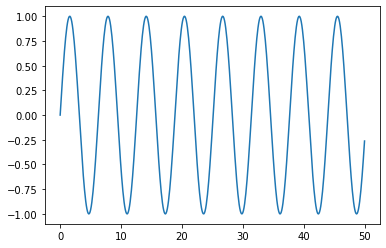

In [4]:
plt.plot(x,y)

In [5]:
df=pd.DataFrame(data=y,index=x,columns=['Sine'])

In [6]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [7]:
len(df)

501

In [8]:
test_percent=0.1

In [9]:
test_point=np.round(len(df)*test_percent)

In [10]:
test_ind=int(len(df)-test_point)

In [11]:
train=df.iloc[:test_ind]

In [12]:
test=df.iloc[test_ind:]

In [13]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler()

In [16]:
scaler.fit(train)

MinMaxScaler()

In [17]:
scaled_train=scaler.transform(train)

In [18]:
scaled_test=scaler.transform(test)

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

In [20]:
length=50
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [23]:
n_feature=1

In [24]:
model=Sequential()

In [25]:
model.add(SimpleRNN(50,input_shape=(length,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 4s 9ms/step - loss: 0.0036
Epoch 2/5
401/401 [==============================] - 4s 9ms/step - loss: 2.6306e-04
Epoch 3/5
401/401 [==============================] - 4s 9ms/step - loss: 1.0020e-04
Epoch 4/5
401/401 [==============================] - 4s 9ms/step - loss: 1.8249e-04
Epoch 5/5
401/401 [==============================] - 4s 9ms/step - loss: 1.3587e-04


In [28]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

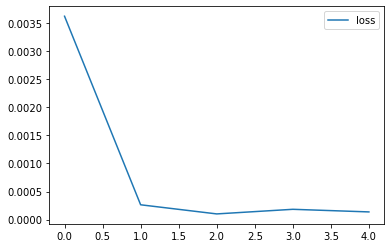

In [29]:
losses.plot()

In [30]:
first_eval_batch=scaled_train[-length:]

In [31]:
first_eval_batch =first_eval_batch.reshape(1,length,n_feature)

In [32]:
model.predict(first_eval_batch)

array([[0.94177336]], dtype=float32)

In [33]:
scaled_test[0]

array([0.94955134])

In [34]:
test_prediction=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_feature))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [35]:
test_prediction

[array([0.94177336], dtype=float32),
 array([0.95818883], dtype=float32),
 array([0.9678554], dtype=float32),
 array([0.97263694], dtype=float32),
 array([0.9726456], dtype=float32),
 array([0.9658455], dtype=float32),
 array([0.95507246], dtype=float32),
 array([0.93891126], dtype=float32),
 array([0.9190898], dtype=float32),
 array([0.89572656], dtype=float32),
 array([0.8678633], dtype=float32),
 array([0.83735114], dtype=float32),
 array([0.8033288], dtype=float32),
 array([0.7670338], dtype=float32),
 array([0.7284118], dtype=float32),
 array([0.6877925], dtype=float32),
 array([0.6455415], dtype=float32),
 array([0.60202014], dtype=float32),
 array([0.5579491], dtype=float32),
 array([0.51307166], dtype=float32),
 array([0.46838576], dtype=float32),
 array([0.42384547], dtype=float32),
 array([0.37989375], dtype=float32),
 array([0.3373692], dtype=float32),
 array([0.29607153], dtype=float32),
 array([0.25717217], dtype=float32),
 array([0.22025688], dtype=float32),
 array([0.186

In [36]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [37]:
 true_prediction=scaler.inverse_transform(test_prediction)

In [38]:
test['Predictions']=true_prediction

In [39]:
test

,Sine,Predictions
45.1,0.899097,0.883541
45.2,0.938307,0.916372
45.3,0.968142,0.935705
45.4,0.988304,0.945268
45.5,0.998591,0.945285
45.6,0.998900,0.931685
45.7,0.989229,0.910139
45.8,0.969673,0.877817
45.9,0.940429,0.838175
46.0,0.901788,0.791449


<AxesSubplot:>

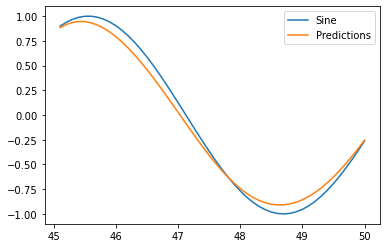

In [40]:
test.plot()

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
earl=EarlyStopping(monitor='val_loss',patience=2)

In [43]:
length=49
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [44]:
model=Sequential()
model.add(LSTM(50,input_shape=(length,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [45]:
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=earl)

Epoch 1/20
402/402 [==============================] - 8s 21ms/step - loss: 0.0160 - val_loss: 1.2346e-05
Epoch 2/20
402/402 [==============================] - 7s 18ms/step - loss: 1.2471e-04 - val_loss: 2.2219e-05
Epoch 3/20
402/402 [==============================] - 7s 18ms/step - loss: 3.4048e-04 - val_loss: 2.3565e-05


In [46]:
test_prediction=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_feature))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [47]:
 true_prediction=scaler.inverse_transform(test_prediction)

In [48]:
test['LSTM Predictions']=true_prediction

<AxesSubplot:>

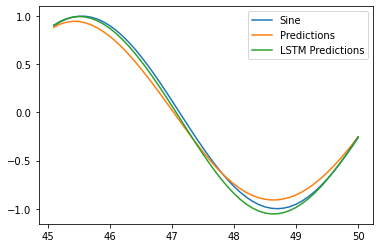

In [49]:
test.plot()

In [50]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [51]:
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [52]:
model=Sequential()
model.add(LSTM(50,input_shape=(length,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [53]:
model.fit(generator,epochs=6)

Epoch 1/6
452/452 [==============================] - 8s 18ms/step - loss: 0.0156
Epoch 2/6
452/452 [==============================] - 8s 17ms/step - loss: 1.8273e-04
Epoch 3/6
452/452 [==============================] - 8s 18ms/step - loss: 2.5799e-04
Epoch 4/6
452/452 [==============================] - 8s 18ms/step - loss: 1.5025e-04
Epoch 5/6
452/452 [==============================] - 8s 17ms/step - loss: 6.0856e-05
Epoch 6/6
452/452 [==============================] - 8s 17ms/step - loss: 4.2574e-04


In [54]:
#forecasting 25 data point
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_feature))

for i in range(25):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [55]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [56]:
forecast=scaler.inverse_transform(forecast)

In [57]:
forecast_index=np.arange(50.1,52.6,step=0.1)

In [58]:
len(forecast_index)

25

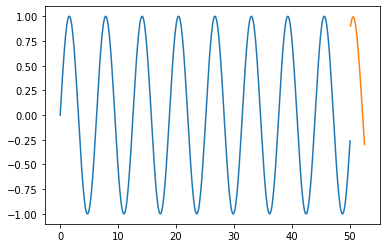

In [60]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)